In [42]:
# Importing and cleaning data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("df.csv")

# Ensuring age is integer
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Replacing height with random values between 150-180 cm
df["height"] = np.random.randint(150, 181, df.shape[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
 9   height    458 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


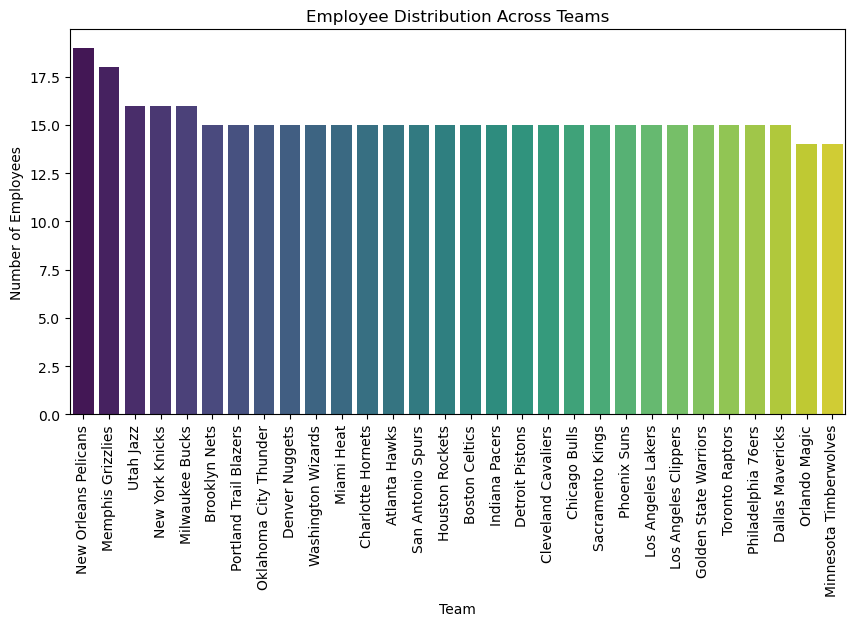

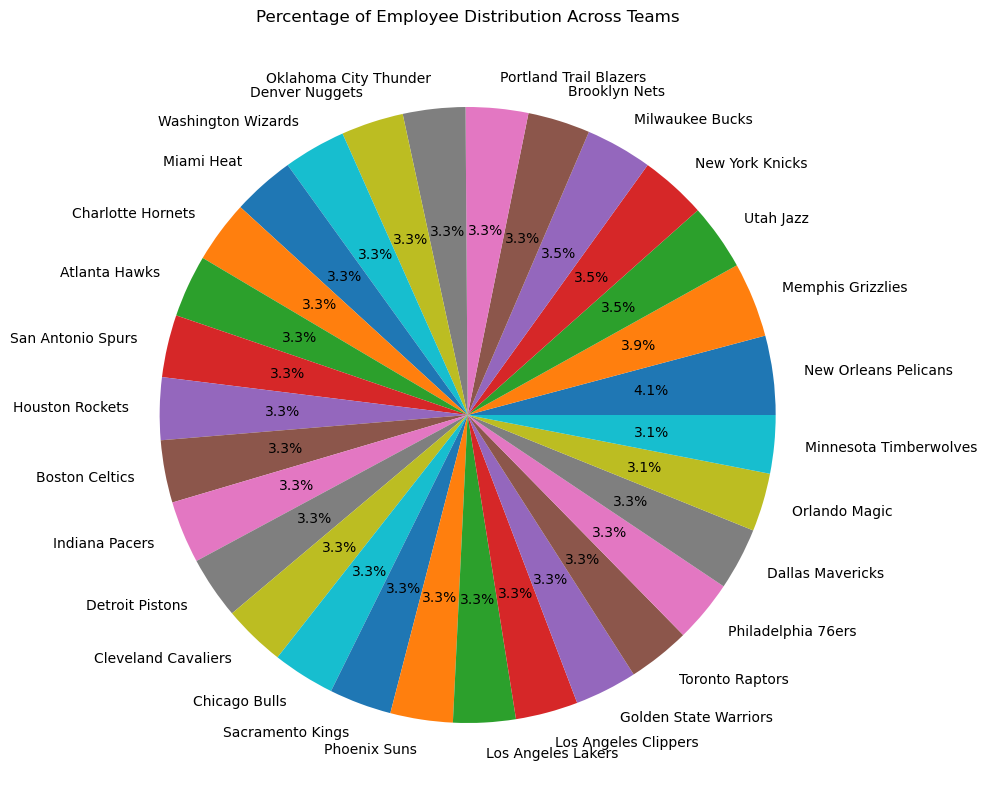

In [27]:
team_counts = df["Team"].value_counts()
team_percentage = (team_counts.values / len(df)) * 100

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=team_counts.index, y=team_counts.values, hue=team_counts.index, palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.title("Employee Distribution Across Teams")
plt.ylabel("Number of Employees")
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(team_percentage,labels=team_counts.index,autopct="%1.1f%%")
plt.title("Percentage of Employee Distribution Across Teams")
plt.show()

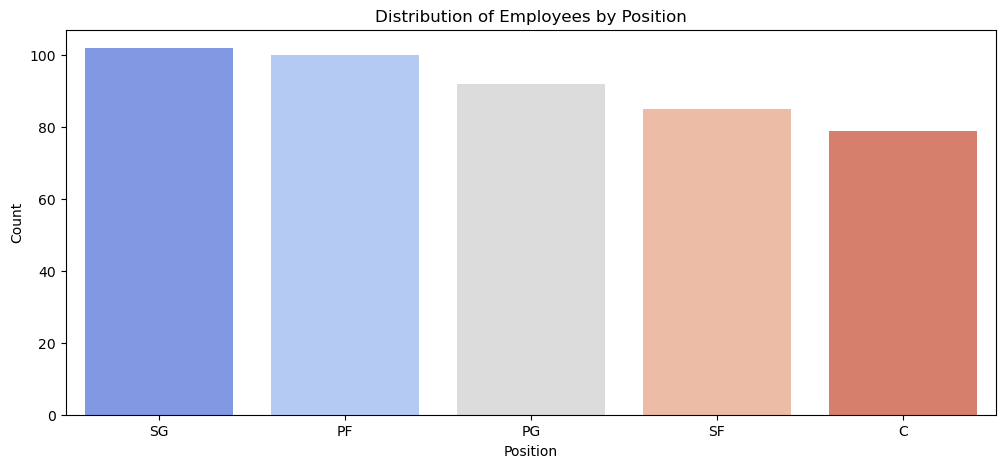

In [32]:
position_counts = df["Position"].value_counts()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=position_counts.index, y=position_counts.values, palette="coolwarm", hue=position_counts.index, legend=False)
plt.title("Distribution of Employees by Position")
plt.ylabel("Count")
plt.show()

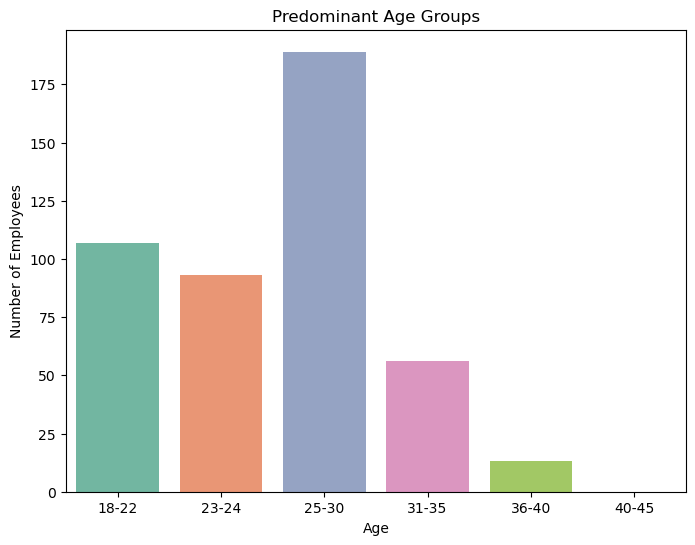

In [46]:
bins = [18, 23, 25, 31, 36, 40, 46]
labels = ["18-22", "23-24", "25-30", "31-35", "36-40","40-45"]
df["Age"] = pd.cut(df["Age"], bins=bins, labels=labels)

age_group_counts = df["Age"].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="Set2", hue=age_group_counts.index, legend=False)
plt.title("Predominant Age Groups")
plt.ylabel("Number of Employees")
plt.show()

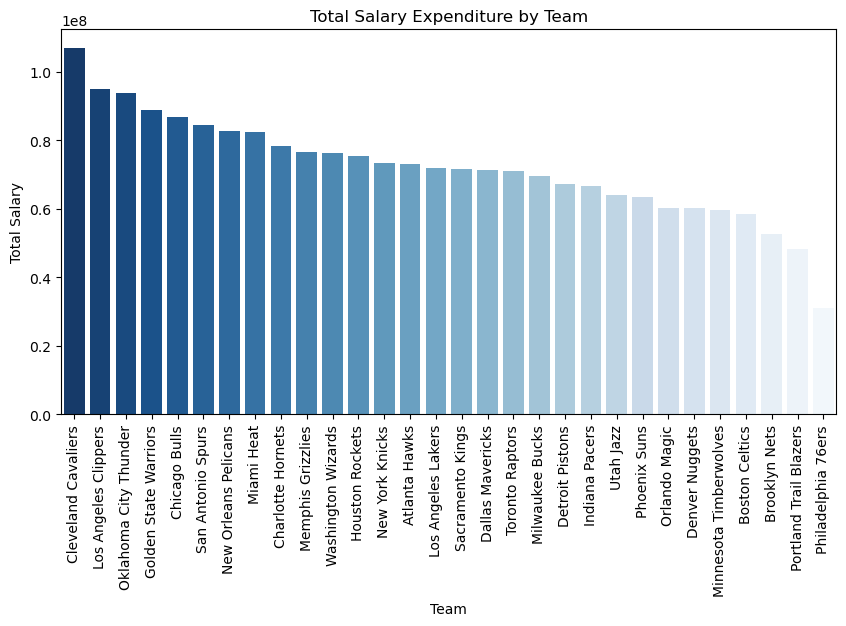

In [48]:
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Plot team salary
plt.figure(figsize=(10, 5))
sns.barplot(x=team_salary.index, y=team_salary.values, palette="Blues_r", hue=team_salary.index, legend=False)
plt.xticks(rotation=90)
plt.title("Total Salary Expenditure by Team")
plt.ylabel("Total Salary")
plt.show()

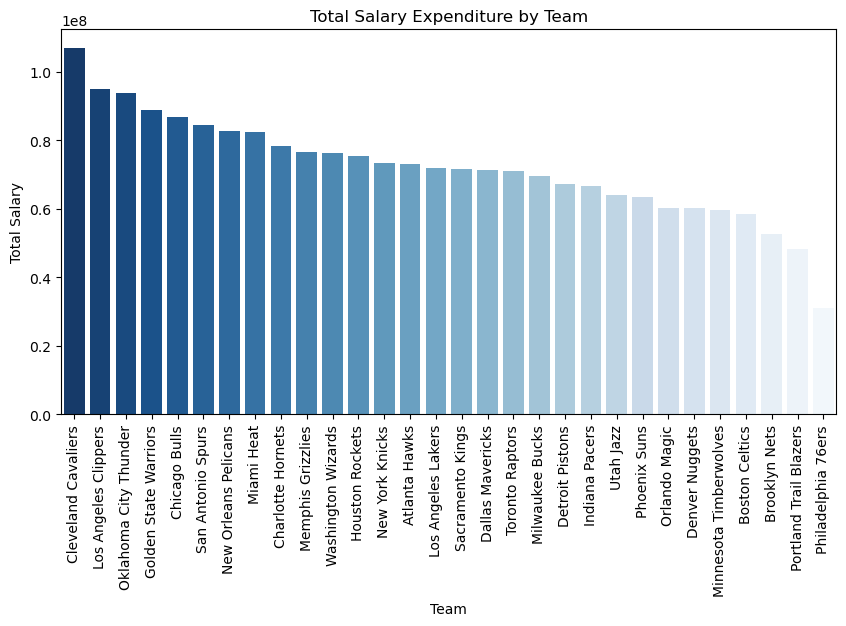

In [50]:
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Plot team salary
plt.figure(figsize=(10, 5))
sns.barplot(x=team_salary.index, y=team_salary.values, palette="Blues_r", hue=team_salary.index)
plt.xticks(rotation=90)
plt.title("Total Salary Expenditure by Team")
plt.ylabel("Total Salary")
plt.show()

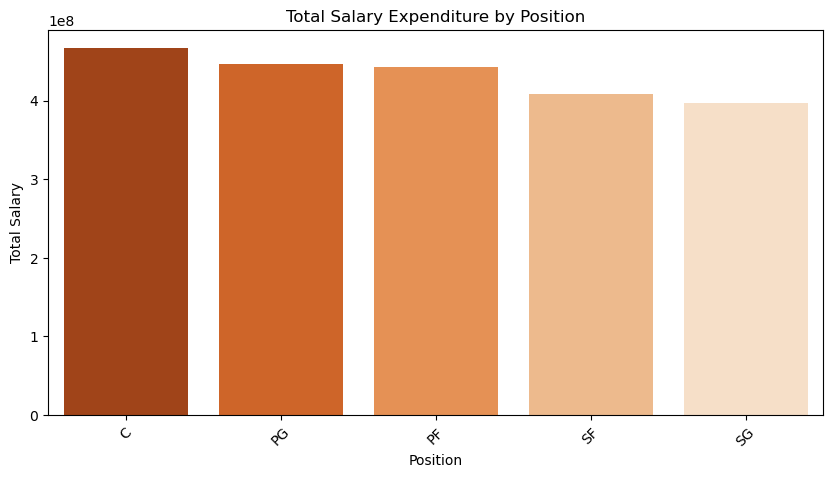

In [51]:
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=position_salary.index, y=position_salary.values, palette="Oranges_r", hue=position_salary.index )
plt.xticks(rotation=45)
plt.title("Total Salary Expenditure by Position")
plt.ylabel("Total Salary")
plt.show()

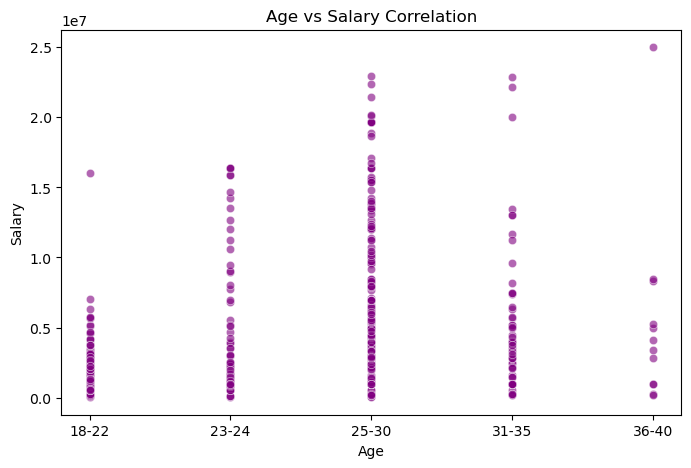

In [58]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"], alpha=0.6, color="purple")
plt.title("Age vs Salary Correlation")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()